# Simple Linear Regression

---

### 1. Maths

This notebook discusses the implementation of the simple linear regressor in which we have one feature (input) vs one target (output).

$$y = b_0 + b_1 * x \tag{1}$$

The coefficients $b_0$ and $b_1$ are to be computed from our linear regression model using some statistical properties like mean, variance and covariance.

$$b_1 = \frac{\sum_{i=1}^{n} (x_i - \mu_x) * (y_i * \mu_y)}{\sum_{i=1}^{n} (x_i - \mu_x)^2} = \frac{covariance(x, y)}{variance(x)}\tag{2}$$

$$b_0 = \mu_y - b_1 * \mu_x \tag{3}$$

In [1]:
import numpy as np
import pandas as pd

### 2. Mean

We will use `np.mean` to calculate the mean of the feature `x`.

In [2]:
def mean(x):
    return np.mean(x, axis = 0)

`axis = 0` means we will take the mean of each column in `x`. If we set `axis` to `1`, it will calculate the mean for each row. In structured data, we prefer to have the rows indicate examples and columns indicate the features.

> Note: not setting `axis`, its default is `None` will calculate the mean of all the data in `x` which is the same as `axis = 1` for the case that `x` is of the shape of `(-1, 1)`.

### 3. Variance

The variance of some data is the summation of the squared differences of each element in the data from the mean of the data.

$$variance(X) = \sigma_X^2 = \sum_{i=1}^{n_X}(x_i - \mu_X)^2$$

* For summation, we will use `np.sum` which will returns the sum of an array along `axis`, which we will sit again to `0` as we want to calculate the variance of the feature.

* For power, we will use `np.power(x, 2)` which will raise `x` to the power of `2`.

* Subtracting `x`, which in this notebook is an array of shape `(-1, 1)`, from a single value `mean(x)` will be done element-wise due to [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). 

In [3]:
def variance(x):
    x_mean = mean(x)
    x_var = np.sum(np.power(x - x_mean, 2), axis = 0)
    return x_var

In [4]:
X = np.array([1, 2, 4, 3, 5]).reshape(-1, 1)
y = np.array([1, 3, 3, 2, 5]).reshape(-1, 1)

mean_x, mean_y = mean(X), mean(y)  # expected: 3.0, 2.8
var_x, var_y = variance(X), variance(y) # expected: 10.0, 8.8
print(mean_x, mean_y, var_x, var_y)

[3.] [2.8] [10.] [8.8]


### 4. Covariance

The covariance between 2 sets of data (same size) is the summation of the multiplication of the differences betweem each point of the data and the mean of the point's data set.

$$covariance(X, Y) = \sum_{i=1}^{n_X=n_y} (x_i - \mu_X)(y_i - \mu_Y)$$

The multiplication of $(x-\bar x)$, which is an array of shape (-1, 1), and $(y-\bar y)$, which is an array of the same shape is **element-wise**. We can do element-wise multiplication between 2 arrays `x` and `y`, must be of the same size, by either using `x * y` or `np.multiply(x, y)`. Here, We use the latter.

In [5]:
def covariance(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    covariance = np.sum(np.multiply(x - mean_x, y - mean_y))
    return covariance

### 5. Coefficients Calculation

We will the equations **(2) and (3)** and the functions we implemented to calculate the coefficients $b_0$ and $b_1$.

In [6]:
def estimate_coef(x, y):
    b1 = covariance(x, y) / variance(x)
    b0 = mean(y) - b1 * mean(x)
    return b0, b1

In [7]:
b0, b1 = estimate_coef(X, y)
b0, b1 # should be 0.4, 0.8

(array([0.4]), array([0.8]))

When running the above cell, that is based on `X` and `y` which we defined earlier to calculate the mean and variance of each, the coefficients `b0` and `b1` will be used to predict any future input using the equation **(1)**.

$$y = 0.4 + 0.8 x$$

### 6. RMSE and R $^2$

The RMSE, root mean square error between the predicted values and the actual values, is one of the most common metrics to be used to check the performance of the model, the less the better and it's dependent on the data. On the other hand, the R-squared (R $^2$) measure the correlation between the predicted values and the actual values. The closer to 1 (range [-1, 1]), the better.

$$RMSE = \sqrt{\frac{\sum_{i=1}^{n_Y}(\hat y_i - y_i)^2}{n_Y}}$$

where $n_X$ is the count (size) of the data $Y$, $\hat y_i$ is the predicted value at index $i$.

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where $SS_{res}$ is the sum of the squared differences between each true value and its corresponding predicted value. While $SS_{tot}$ is the sum of the squared differences between each true value and the mean of the set.

The R $^2$ range is [-1, 1] where 1 is the best, while 0 indicates that our regression model predicts exactly the same as the baseline model (which is to take the mean of the true values), and -1 indicates that our regression model predicts worse than the baseline model. Usually, a model with $R^2 \geq 0.7$ is acceptable.

In [8]:
def calculate_rmse(true, predicted):
    error = np.sqrt(np.sum(np.power(true - predicted, 2), axis = 0) / len(true))
    return error

In [9]:
def calculate_r2(true, predicted):
    ss_res = np.sum(np.power(true - predicted, 2), axis = 0)
    ss_tot = np.sum(np.power(true - mean(true), 2), axis = 0)
    return 1 - (ss_res / ss_tot)

I am not the best teacher :( . So if you want to check other metrics used in regression, check these links:

* [basic regression metrics](https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f)
* [advanced regression metrics](https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-2-12d362dd39d9)

### 7. Testing

The above functions are implemented in `SimpleLinearRegression.py` as methods of `SimpleLinearRegression` class with the methods `fit`, `predict`, and `score` used for calculating the regression coefficients, the predicted values given input of single feature, and the score (metric) between the true and predicted values respectively.

We will use a real-life dataset of the swedish auto insurance dataset. It involves the prediction of the total claim payments. [More details](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset)

In [11]:
data = pd.read_csv("assets/dataset.csv", header=None)
data.head()

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [12]:
X = data.iloc[:, :1].values
X.shape

(63, 1)

In [13]:
y = data.iloc[:, -1].values.reshape(-1, 1)
y.shape

(63, 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [15]:
from SimpleLinearRegression import SimpleLinearRegression
swedish_model = SimpleLinearRegression()
swedish_model.fit(X_train, y_train)

(array([27.47430002]), array([3.38052556]))

In [16]:
prediction = swedish_model.predict(X_test)

C:\Users\U\AppData\Local\Temp/ipykernel_33668/3501805808.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([true_plot, predictions_plot], labels = ["True Values", "Predicted Values"], loc = "best")


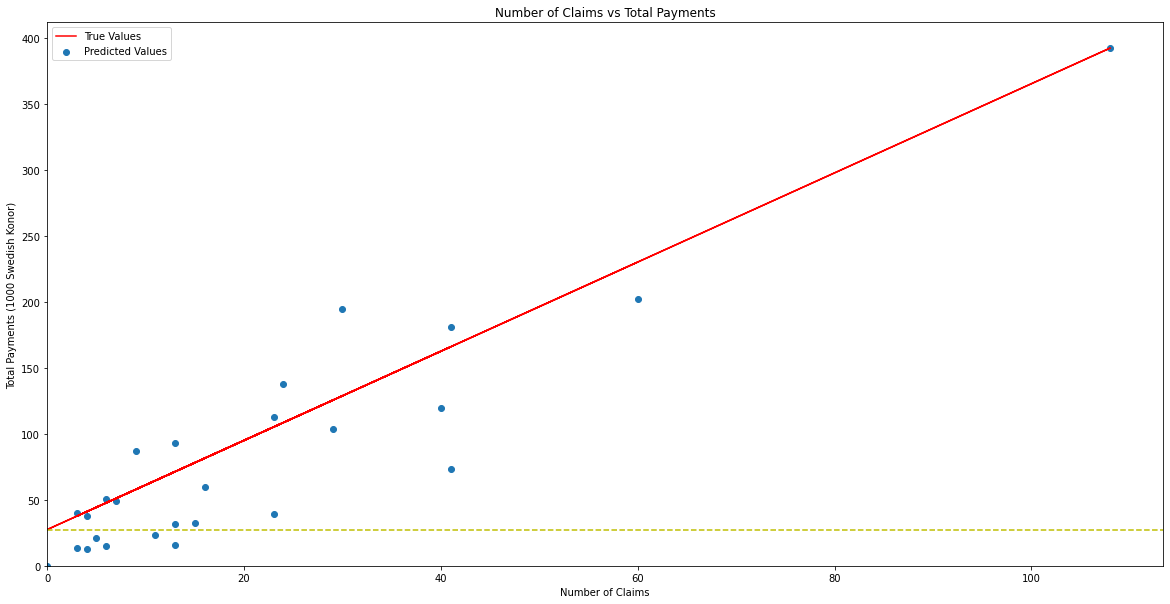

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
true_plot = ax.scatter(X_test, y_test)
predictions_plot = ax.plot(X_test, prediction, c = 'r')
ax.set_xlabel('Number of Claims')
ax.set_ylabel('Total Payments (1000 Swedish Konor)');
ax.legend([true_plot, predictions_plot], labels = ["True Values", "Predicted Values"], loc = "best")
ax.set_title('Number of Claims vs Total Payments')
ax.set_xlim(0)
ax.axhline(swedish_model.b0, linestyle = 'dashed', color = 'y')
ax.set_ylim(0);

In [29]:
r2 = swedish_model.score(y_test, prediction, "r2")
rmse = swedish_model.score(y_test, prediction, "rmse")
print(f"R2: {r2}, RMSE: {rmse}")

R2: [0.80760152], RMSE: [37.0016741]
